In [1]:
# -------
# IMPORT LIBRAIRIES
# -------
import numpy as np
import pandas as pd
import plotly.express as px
from python_module.pricing_model import SABRModel
from python_module.tools import maximize_with_bounds

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.float_format = '{:,.2f}'.format

In [137]:
# -------
# INPUTS
# -------

# Pricing parameters
F     = 5000
alpha = 0.25
beta  = 1.0
rho   = -0.
nu    = 1.5
r     = 0
atm_bd = 20
tail_bd = 20

# Scenario parameters
scenario_min = -0.3
scenario_max = 0.3
scenario_step = 0.05

option_strikes = [-0.3, -0.1, 0]

In [139]:
# Scenario parameters
num = int((scenario_max-scenario_min)/0.01 + 1)
slide_to_compute = list(np.round(np.linspace(start=scenario_min, stop=scenario_max, num=num), 2))

# Option portfolio
market_data_list = list()
for strike in option_strikes:
    K = F * (1+strike)
    T = tail_bd / 250
    option_type = 'call' if K >= F else 'put'
    market_pricing_results = SABRModel.compute_option(F, K, T, alpha, beta, rho, nu, r, option_type, slide_list=slide_to_compute)
    market_data_list.append({
        'symbol': f"{tail_bd}T_{K}K_{option_type}",
        'option_type': option_type, 
        'time_to_maturity': tail_bd, 
        'F':F, 'r': r, 'K': K, 'T': T, 'K/F': (K/F) - 1 ,**market_pricing_results})

market_data_df = pd.DataFrame(market_data_list)
market_data_df = market_data_df.set_index('symbol')

In [141]:
market_data_df['gamma_cash'] = (market_data_df['gamma']*(F**2))/100

In [159]:
X = market_data_df[['gamma_cash', 'theta', -0.3]].transpose().values
b = [277.75, -3.58, 628.36]

In [169]:
market_data_df

,option_type,time_to_maturity,F,r,K,T,K/F,IV,price,delta,gamma,vega,theta,vanna,volga,-0.30,-0.29,-0.28,-0.27,-0.26,-0.25,-0.24,-0.23,-0.22,-0.21,-0.20,-0.19,-0.18,-0.17,-0.16,-0.15,-0.14,-0.13,-0.12,-0.11,-0.10,-0.09,-0.08,-0.07,-0.06,-0.05,-0.04,-0.03,-0.02,-0.01,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,gamma_cash
symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20T_3500.0K_put,put,20,5000,0,"3,500.00",0.08,-0.30,0.36,0.03,-0.00,0.00,0.01,-0.01,-0.01,35.62,99.87,77.68,59.49,44.95,33.57,24.83,18.24,13.32,9.69,7.03,5.09,3.68,2.66,1.92,1.38,0.99,0.71,0.50,0.35,0.24,0.16,0.11,0.07,0.04,0.02,0.01,-0.00,-0.00,-0.01,-0.00,0.00,0.00,0.01,0.02,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.09,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.36
20T_4500.0K_put,put,20,5000,0,"4,500.00",0.08,-0.10,0.27,13.69,-0.08,0.00,2.05,-1.38,-0.73,"1,460.21",870.45,824.45,778.49,732.61,686.83,641.20,595.76,550.60,505.80,461.50,417.86,375.07,333.39,293.09,254.49,217.93,183.76,152.29,123.80,98.47,76.42,57.63,42.01,29.36,19.43,11.92,6.51,2.90,0.78,-0.11,0.00,0.91,2.47,4.53,6.98,9.75,12.76,15.95,19.30,22.76,26.30,29.92,33.59,37.30,41.04,44.81,48.61,52.41,56.23,60.06,63.90,67.74,71.59,75.45,79.30,83.16,87.03,90.89,94.75,98.62,102.49,95.29
20T_5000K_call,call,20,5000,0,"5,000.00",0.08,0.00,0.25,143.13,0.51,0.00,5.64,-3.58,0.06,-2.86,628.36,602.66,576.96,551.26,525.57,499.89,474.22,448.58,422.95,397.37,371.83,346.36,320.98,295.71,270.61,245.72,221.12,196.90,173.15,150.04,127.71,106.38,86.26,67.62,50.72,35.84,23.26,13.21,5.91,1.48,0.00,1.46,5.79,12.84,22.40,34.26,48.15,63.82,81.02,99.51,119.10,139.58,160.80,182.62,204.93,227.63,250.65,273.92,297.39,321.03,344.79,368.66,392.60,416.62,440.68,464.79,488.93,513.10,537.29,561.49,585.71,277.75


In [161]:
market_data_df[['gamma_cash', 'theta', -0.3]].transpose()

symbol,20T_3500.0K_put,20T_4500.0K_put,20T_5000K_call
gamma_cash,0.36,95.29,277.75
theta,-0.01,-1.38,-3.58
-0.30,99.87,870.45,628.36


In [163]:
w = np.linalg.solve(X, b)
weights = pd.Series(w, index=market_data_df.index)
print(weights)

symbol
20T_3500.0K_put   -0.17
20T_4500.0K_put    0.03
20T_5000K_call     0.99
dtype: float64


In [165]:
market_data_df[['gamma_cash', 'theta', -0.3]].multiply(weights, axis=0)

,gamma_cash,theta,-0.30
symbol,,,
20T_3500.0K_put,-0.06,0.00,-17.45
20T_4500.0K_put,2.52,-0.04,22.99
20T_5000K_call,275.30,-3.55,622.82


In [167]:
market_data_df[['gamma_cash', 'theta', -0.3]].multiply(weights, axis=0).sum()

 gamma_cash   277.75
 theta         -3.58
-0.30         628.36
dtype: float64

In [21]:
# ATM Scenarios
atm_market_data = market_data_df.loc[market_data_df['F']==market_data_df['K']]
atm_qty = -50000 / atm_market_data['theta']
atm_scenario = atm_market_data.loc[:, ['theta'] + slide_to_compute]
atm_scenario = atm_scenario.drop(0, axis=1)
atm_scenario.rename(columns={'theta': 0}, inplace=True)
atm_scenario = atm_scenario.sort_index(axis=1)
atm_scenario = atm_scenario.multiply(atm_qty, axis=0)
atm_scenario = atm_scenario.iloc[0].transpose()
target_hedge_portfolio_scenario = atm_scenario*-1

In [23]:
# OTM Scenarios
otm_market_data = market_data_df.loc[market_data_df['F']!=market_data_df['K']]
otm_scenario = otm_market_data.loc[:, ['theta'] + slide_to_compute]
otm_scenario = otm_scenario.drop(0, axis=1)
otm_scenario.rename(columns={'theta': 0}, inplace=True)
otm_scenario = otm_scenario.sort_index(axis=1)
otm_scenario = otm_scenario.transpose()

In [25]:
X = otm_scenario.loc[flat_scenarios].values
b = target_hedge_portfolio_scenario.loc[flat_scenarios].values
w = np.linalg.solve(X, b)
weights = pd.Series(w, index=otm_market_data.index)
print(weights)

symbol
20T_3500.0K_put    -86,489.79
20T_6500.0K_call   -44,813.79
dtype: float64


In [27]:
otm_scenario

symbol,20T_3500.0K_put,20T_6500.0K_call
-0.30,99.87,3.26
-0.29,77.68,3.14
-0.28,59.49,3.02
-0.27,44.95,2.90
-0.26,33.57,2.78
-0.25,24.83,2.66
-0.24,18.24,2.54
-0.23,13.32,2.42
-0.22,9.69,2.31
-0.21,7.03,2.19


In [167]:
total_scenario = atm_scenario + (otm_scenario * weights).sum(axis=1)

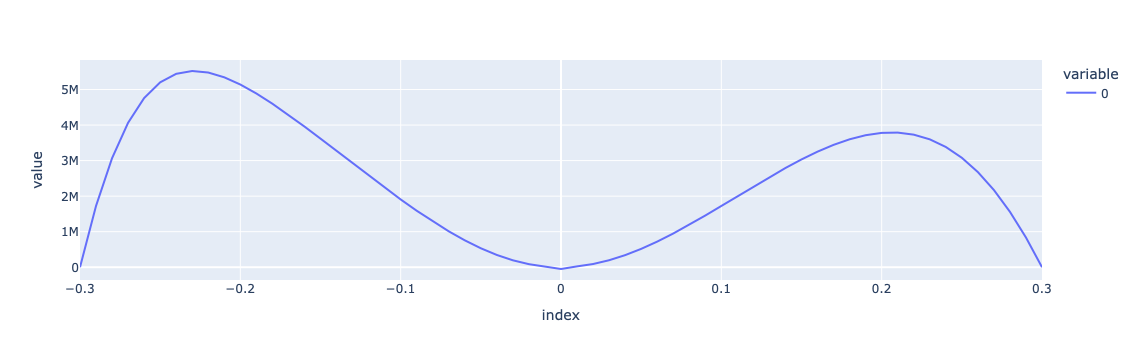

In [168]:
px.line(total_scenario*(-50000/total_scenario.loc[0]))

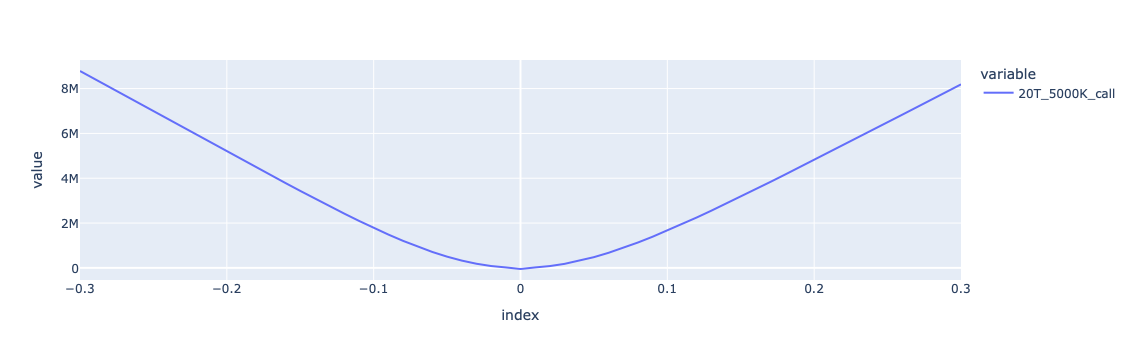

In [169]:
px.line(atm_scenario)